## 作業目標
* 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
* 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義

In [7]:
import os
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU
from jupyterthemes import jtplot
jtplot.style()

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

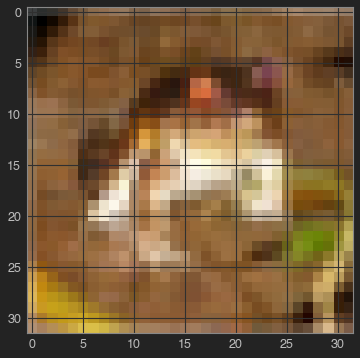

In [42]:
image = train[0][0] # 讀取圖片
fig = plt.figure(figsize=(8,6))
plt.imshow(image)
plt.show()
fig.savefig('frog.png', bbox_inches='tight', dpi=300)

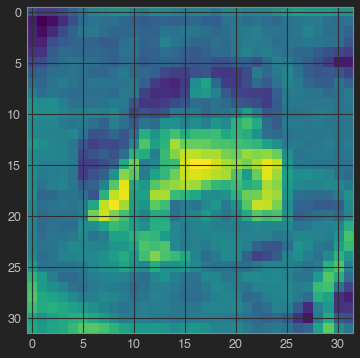

In [43]:
# 把彩色的圖片轉為灰度圖
fig = plt.figure(figsize=(8,6))
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()
fig.savefig('frog_gray.png', bbox_inches='tight', dpi=300)

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

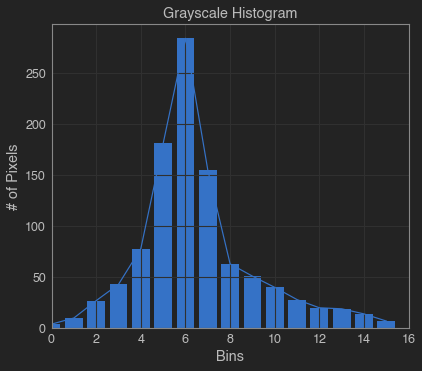

In [32]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
bins = 16
hist = cv2.calcHist([gray], [0], None, [bins], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.bar(range(len(hist)), hist[:,0])
plt.xlim([0, bins])
plt.show()

In [33]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (16, 1) 
直方圖中前兩個值: [[ 4.]
 [10.]]


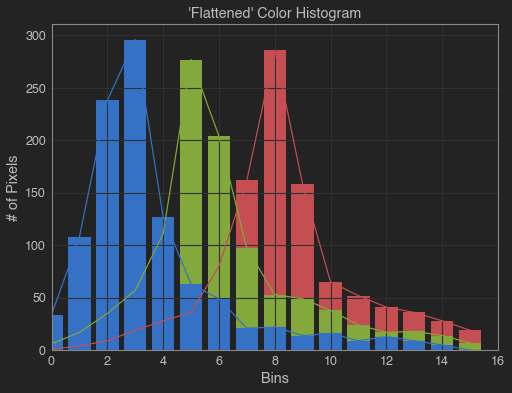

In [46]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")



# 對於所有 channel
fig = plt.figure(figsize=(8,6))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [bins], [0, 256])
 
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.bar(range(len(hist)), hist[:,0], color = color)
    plt.xlim([0, bins])
plt.show()
fig.savefig('color_hist.png', bbox_inches='tight', dpi=300)

In [ ]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2])